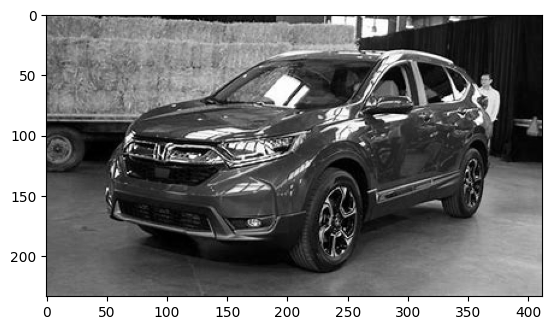

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
# Read in the image
image = mpimg.imread('edge_detection_ex.jpg')
plt.imshow(image)
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')  # requires color information so we pass cmap='gray'

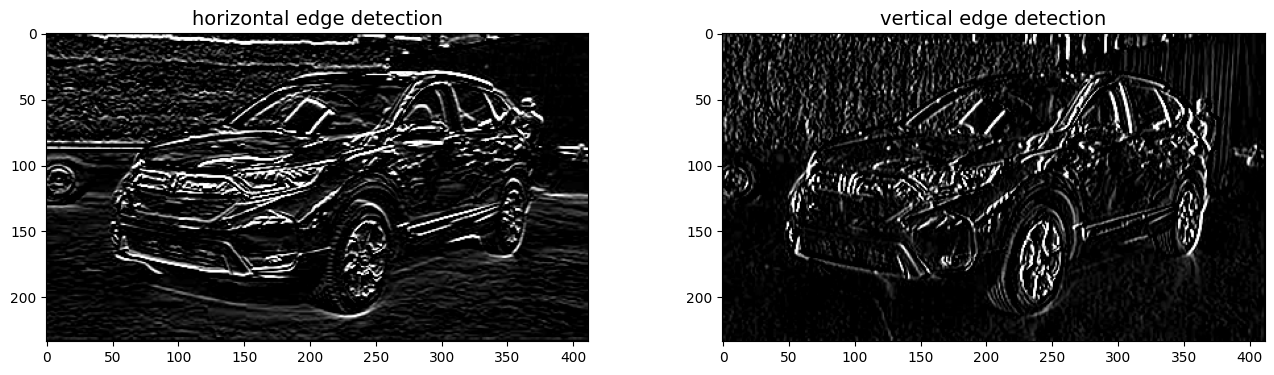

In [6]:
# 3x3 sobel filter for horizontal edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
# vertical edge detection
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# filter the image using filter2D(grayscale image, bit-depth, kernel)  
filtered_image1 = cv2.filter2D(gray, -1, sobel_y)
filtered_image2 = cv2.filter2D(gray, -1, sobel_x)

f, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].set_title('horizontal edge detection', fontsize=14)
ax[0].imshow(filtered_image1, cmap='gray')
ax[1].set_title('vertical edge detection', fontsize=14)
ax[1].imshow(filtered_image2, cmap='gray')

Other method

[[-1  0  1]
 [-2  0  1]
 [-1  0 -1]] is a kernel for detecting horizontal edges
[[-1 -2 -1]
 [ 1  0  1]
 [ 1  2  1]] is a kernel for detecting vertical edges


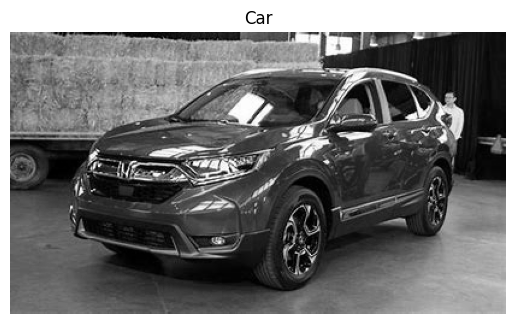

ValueError: operands could not be broadcast together with shapes (234,412) (3,3) 

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# let img1 be an image with no features

kernel_horizontal = sobel_x
print(kernel_horizontal, 'is a kernel for detecting horizontal edges')

kernel_vertical = sobel_y
print(kernel_vertical, 'is a kernel for detecting vertical edges')

# We will apply the kernels on the images by
# elementwise multiplication followed by summation
def apply_kernel(img, kernel):
	return np.sum(np.multiply(img, kernel))

# Visualizing img1
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title('Car')
plt.show()

# Checking for horizontal and vertical features in image1
print('Horizontal edge features:', apply_kernel(gray, 
											kernel_horizontal))
print('Vertical edge features:', apply_kernel(gray, 
											kernel_vertical))

In [103]:
print(gray.shape)
gray1 = gray
print(gray1.shape)

(234, 412)
(234, 412)


In [104]:
k3_image = np.pad(gray1, [(1,1), (1,1)], mode='constant', constant_values=0)  # for 3x3 kernel
k5_image = np.pad(gray1, [(2,2), (2,2)], mode='constant', constant_values=0)  # for 3x3 kernel


In [105]:
k3_image.shape, k5_image.shape

((236, 414), (238, 416))

In [108]:
s = 1 # strides (steps)
kernel  = kernel_horizontal
image = k3_image
k_height, k_width = kernel.shape
img_height, img_width = image.shape
convImg_height, convImg_width = (img_height-k_height)//s +1, (img_width-k_width)//s+ 1

convImg = np.zeros((convImg_height, convImg_width)).astype(float)

for y in range(0,228):#convImg_height):
    for x in range(0,228):#convImg_width):
        img_area = convImg[y*s:y*s+k_height, x*s:x*s+k_width]
        conv_patch =  img_area * kernel
        
        conv_patch_array = (conv_patch).astype(float)
        convImg[y][x]= np.sum(conv_patch_array)

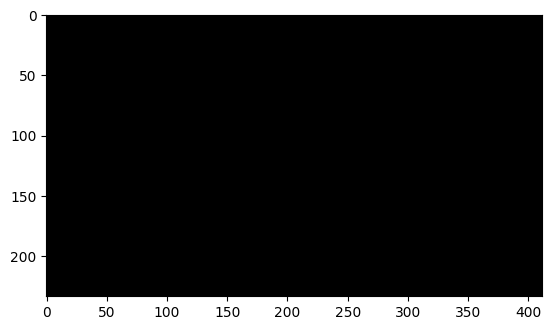

In [109]:
plt.imshow(convImg, cmap='gray')

In [110]:
# Checking for horizontal and vertical features in image1
print('Horizontal edge confidence score:', apply_kernel(gray1, 
											kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(gray1, 
											kernel_vertical))



ValueError: operands could not be broadcast together with shapes (234,412) (3,3) 